# Data Visualisation: An Introduction

Data visualisation is an essential technique that turns intricate data into insightful narratives, enabling clearer understanding of complex information. In this introduction to data visualisation, we will explore its significance and the art of presenting data compellingly.

## Introducing Bar Plots with [Matplotlib](https://matplotlib.org/stable/index.html)

[Matplotlib](https://matplotlib.org/stable/index.html) is among the leading Python libraries for data visualisation. A bar plot, or bar chart, is a chart that represents categorical data with rectangular bars. The lengths of these bars are proportional to the values they represent, making it a clear and concise way to illustrate comparisons among categories. 

In [ ]:
# Importing the pyplot module from matplotlib library as plt
import matplotlib.pyplot as plt

In [ ]:
# List of specified cities
cities = ["Moscow", "London", "Istanbul", "Tokyo", "New York"]

# Corresponding populations for the year 2023
populations = [12680389, 9648110, 15847768, 37194105, 7888121]

# Enhanced color palette for visual representation
colours = ['#E63946', '#457B9D', '#F4A261', '#2A9D8F', '#A8DADC']

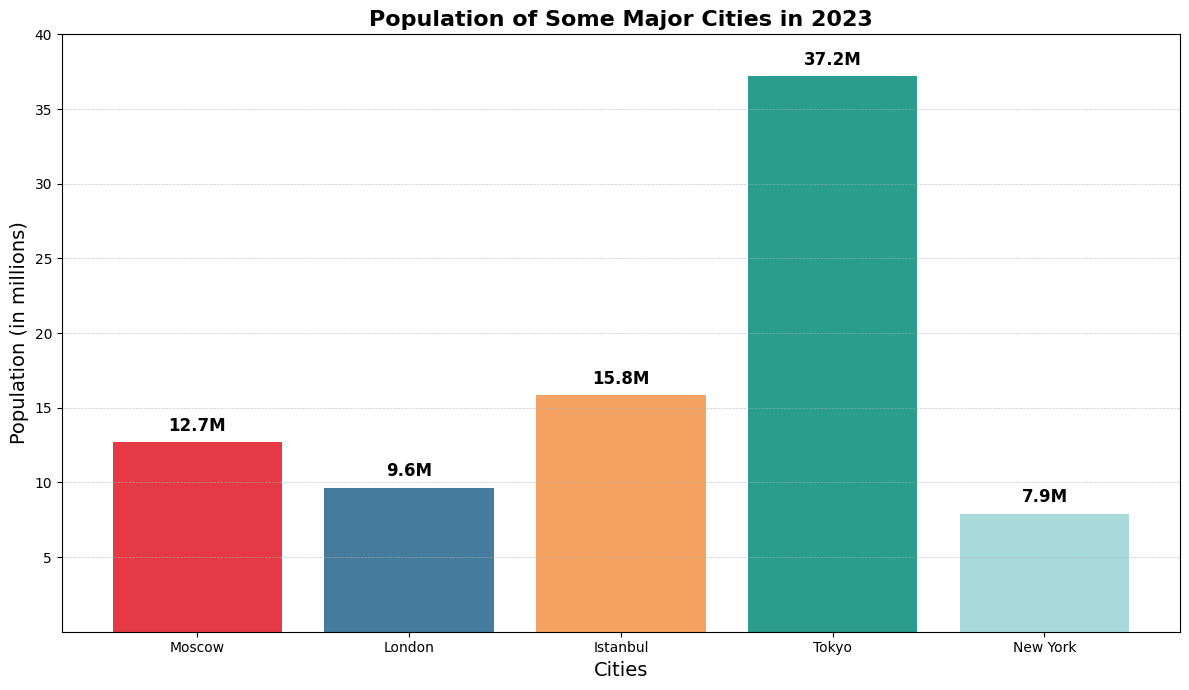

In [ ]:
# Setting the figure size for a wider plot
plt.figure(figsize=(12, 7))

# Plotting the bar chart with labels on top of the bars
bars = plt.bar(cities, populations, color=colours)
plt.title("Population of Some Major Cities in 2023", fontsize=16, fontweight='bold')
plt.xlabel("Cities", fontsize=14)
plt.ylabel("Population (in millions)", fontsize=14)

# Adjusting y-axis to show numbers as fractions of a million
plt.yticks([5e6, 10e6, 15e6, 20e6, 25e6, 30e6, 35e6, 40e6],
           ['5', '10', '15', '20', '25', '30', '35', '40'])

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Function to add labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5e6,
                 '{:.1f}M'.format(height/1e6),
                 ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

add_labels(bars)

plt.tight_layout()
plt.show()


## Bar Plots with [Plotly](https://plotly.com/python/)

[Plotly](https://plotly.com/python/) is an interactive Python library for data visualisation.

In [ ]:
import plotly.express as px

fig = px.bar(
             x=cities, 
             y=populations,
             color=cities,
             color_discrete_sequence=colours,
             title="Population of Some Major Cities in 2023",
             height=600,  # Making the chart taller
             width=800)  # Making the chart wider

# Removing bar labels and adding spike lines for y-axis
fig.update_traces(text=[], hoverinfo='x+y')
fig.update_layout(
    hovermode='x',  # Change to x for better hover behavior with bar charts
    spikedistance=1000,  # maximum distance for which spikes are shown
    hoverdistance=100,  # Distance to show hover label
    xaxis=dict(
        title="Cities",  # x-axis label
        showspikes=True,  # Show spike line for X-axis
        spikemode='across',  # Show spike line for both axis
        spikesnap='cursor',  # Snap spike line to cursor
        showline=True,
    ),
    yaxis=dict(
        title="Population (in millions)",  # y-axis label
        showspikes=True,  # Show spike line for Y-axis
        spikemode='across',  # Show spike line for both axis
        spikesnap='cursor',  # Snap spike line to cursor
        showline=True,
    )
)

# Display the plot
fig.show()

## Pandas

Pandas is a powerful and widely-used Python library for data analysis and manipulation. It provides data structures like Series and DataFrame, which make it easy to handle and analyze structured data. Think of Pandas as a tool that allows you to work with tables (like Excel sheets) directly within Python.



In [ ]:
import pandas as pd
df = pd.read_csv('/work/world-city.csv')

In [ ]:
df


,pop2023,pop2022,city,country,growthRate,type,rank
0,37194105,37274002,Tokyo,Japan,-0.0021,w,1
1,32941309,32065760,Delhi,India,0.0273,w,2
2,29210808,28516903,Shanghai,China,0.0243,w,3
3,23209616,22478117,Dhaka,Bangladesh,0.0325,w,4
4,22619736,22429799,Sao Paulo,Brazil,0.0085,w,5
...,...,...,...,...,...,...,...
773,752916,734805,Tongling,China,0.0246,w,774
774,752744,729109,Tirupati,India,0.0324,w,775
775,751679,733917,Wuzhou,China,0.0242,w,776
776,750102,723114,Yuxi,China,0.0373,w,777


In [ ]:
# Extracting the populations for 2023 for the specified cities one by one
moscow_pop_2023 = df[df["city"] == "Moscow"]["pop2023"].values[0]
london_pop_2023 = df[df["city"] == "London"]["pop2023"].values[0]
istanbul_pop_2023 = df[df["city"] == "Istanbul"]["pop2023"].values[0]
tokyo_pop_2023 = df[df["city"] == "Tokyo"]["pop2023"].values[0]
new_york_city_pop_2023 = df[df["city"] == "New York City"]["pop2023"].values[0]

[moscow_pop_2023, london_pop_2023, istanbul_pop_2023, tokyo_pop_2023, new_york_city_pop_2023]

[12680389, 9648110, 15847768, 37194105, 7888121]

In [ ]:
# Creating a boxplot using Plotly Express with a logarithmic y-axis
fig = px.box(df, y="pop2023", log_y=True, title="Population Distribution of Cities in 2023 (Log Scale)")

# Adding y-axis label
fig.update_layout(yaxis_title="Population (2023)", xaxis_title="All Cities")

# Displaying the plot
fig.show()


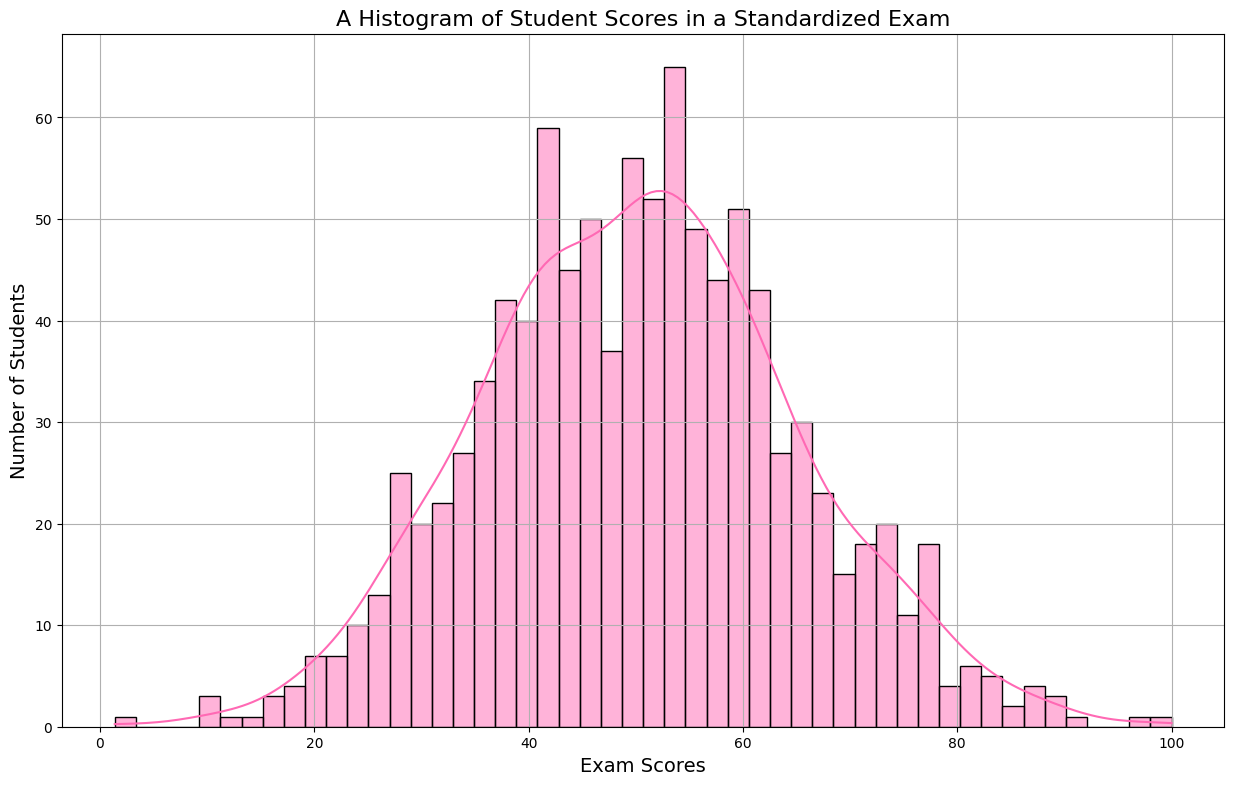

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seed for reproducibility
np.random.seed(42)

# Generate normally distributed random data
fake_data = np.random.randn(1000)

# Adjust the data: Shift the mean to 50 and scale with a standard deviation of 15
# Then clip the values to be between 0 and 100
adjusted_fake_data = 50 + 15 * fake_data
adjusted_fake_data = np.clip(adjusted_fake_data, 0, 100)

# Set the size of the figure to make the chart longer
plt.figure(figsize=(15, 9))

# Plot the histogram with Seaborn and overlay the KDE in default color
sns.histplot(adjusted_fake_data, bins=50, kde=True, color='#FF69B4')

# Set the title, labels, and grid for the plot
plt.title("A Histogram of Student Scores in a Standardized Exam", fontsize=16)
plt.xlabel("Exam Scores", fontsize=14)
plt.ylabel("Number of Students", fontsize=14)
plt.grid(True)

# Display the plot
plt.show()


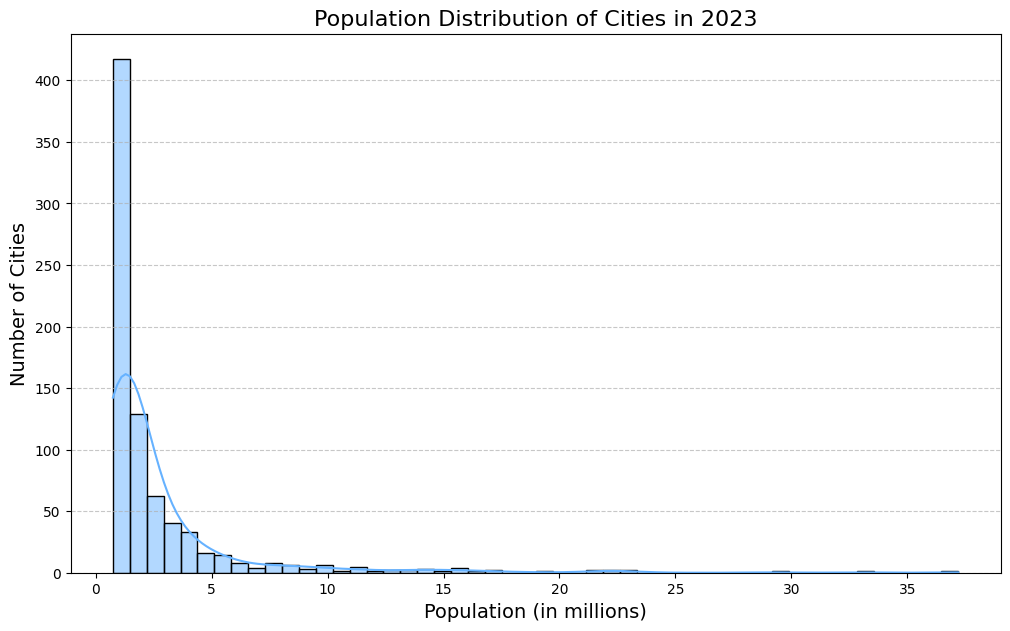

In [ ]:
# Creating a Seaborn histogram for the 'pop2023' column
import seaborn as sns

# Adjusting the x-axis to represent millions and creating the Seaborn histogram
plt.figure(figsize=(12, 7))
sns.histplot(df['pop2023']/1e6, bins=50, kde=True, color='#66b2ff')

# Setting title and labels
plt.title("Population Distribution of Cities in 2023", fontsize=16)
plt.xlabel("Population (in millions)", fontsize=14)
plt.ylabel("Number of Cities", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
